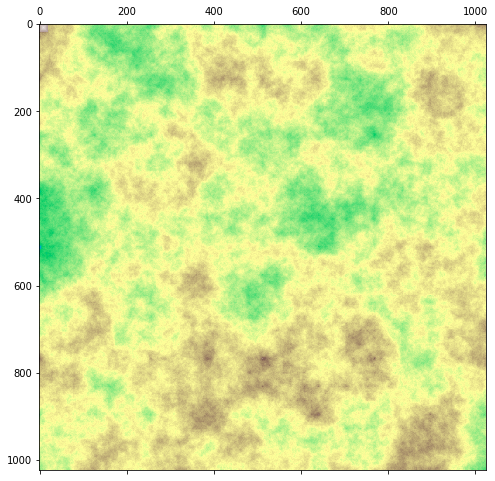

((10, 10), 95.0)

In [358]:
import numpy as np
import matplotlib.pyplot as plt
from hkb_diamondsquare import DiamondSquare as DS
# Make a 9x9 grid...
nrows, ncols = 1024,1024

#make a height map of size 16x20, with values ranging from 1 to 100, with moderate roughness
image = DS.diamond_square(shape=(nrows, ncols), 
                         min_height=1, 
                         max_height=100,
                         roughness=0.65,
                         random_seed=110)

def make_peak(r, c):
    v = 95
    inc = 1
    for i in range(10,0,-1):
        for j in range(r-i, r+i+1):
            for k in range(c-i, c+i+1):
                image[j, k] = v-inc*i
    image[r, c] = v

make_peak(10, 10)

plt.matshow(image, cmap="terrain", vmin=1, vmax=100)
plt.show()

np.unravel_index(image.argmax(), image.shape), np.max(image)

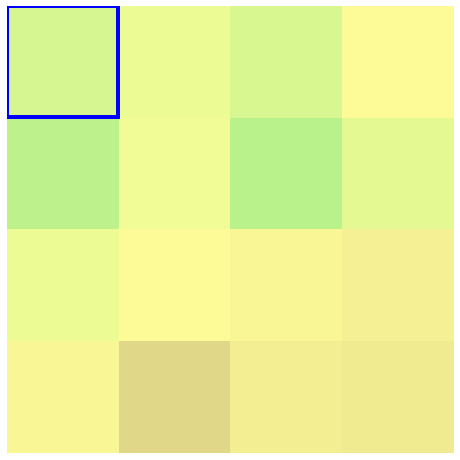

((768, 256), 56.43243982686484)

In [385]:
from matplotlib.patches import Rectangle

def get_res(image, res):
    res_image = image.copy()
    r, c = res_image.shape
    l = 2**res
    for i in range(r // l):
        for j in range(c // l):
            res_image[i*l:(i+1)*l,j*l:(j+1)*l] = np.mean(image[i*l:(i+1)*l,j*l:(j+1)*l])
    return res_image

def get(res_image, res, r, c):
    l = 2**res
    return res_image[l*r, l*c]

def draw(res, r, c, color='red'):
    l = 2**res
    plt.gca().add_patch(Rectangle((l*r-1,l*c-1),l-1,l-1,
                        edgecolor=color,
                        facecolor='none',
                        lw=4))
    
def run(start_res, end_res, dec, obtain):
    coords = []
    for res in range(start_res, end_res-1, -dec):
        res_image = get_res(image, res)
        l = 2**res
        r = nrows // l
        c = ncols // l
        dl = 2**dec
        li = []
        if res == start_res:
            for i in range(r):
                for j in range(c):
                    li.append((get(res_image, res, i, j), res, i, j))
        else:
            pre_li = coords[-1]
#             print("pre", pre_li)
            for _res, x, y in pre_li:
                for i in range(x*dl, (x+1)*dl):
                    for j in range(y*dl, (y+1)*dl):
                        li.append((get(res_image, res, i, j), res, i, j))
        li = sorted(li)[::-1][:obtain]
#         print(li)
        coord = [(res, x, y) for _, res, x, y in li]
#         print(coord)
        coords.append(coord)
    return coords
res = 8
res_image = get_res(image, res)
plt.matshow(res_image, cmap="terrain", vmin=1, vmax=100)
plt.axis('off')
coords = run(8, 4, 1, 16)
if res == 8:
    draw(res, 0, 0, "blue")
#     draw(res, 1, 3, "blue")
else:
    for li in coords:
    #     print("HERE", li)
        for _res, x, y in li:
            if _res == res:
                draw(res, y, x)
plt.show()
np.unravel_index(res_image.argmax(), res_image.shape), np.max(res_image)

In [370]:
1024x1024=2^20
512x512=2^18
256x256=2^16
128x128=2^14
64x64=2^12
32x32=2^10
16x16=2^8
8x8=2^6
4x4=2^4

SyntaxError: invalid syntax (900921300.py, line 1)

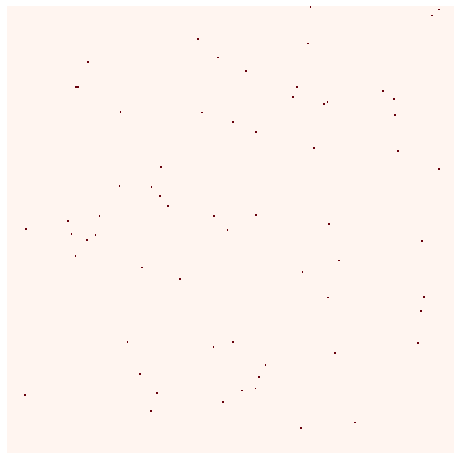

In [357]:
img = np.zeros((1024,1024))
for i in range(2**6):
    l = 4
    r, c = np.random.randint(1024-l), np.random.randint(1024-l)
    for j in range(r,r+l):
        for k in range(c,c+l):
            img[j,k]=1
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(img, cmap="Reds")
plt.axis('off')
plt.show()

In [ ]:
Start with H=1
2 500001 1000000
500001 750000 1000000
750000 875000 1000000
875000 937500 1000000
937500 968750 1000000
968750 984375 1000000
984375 992187 1000000
992187 996093 1000000
996093 998046 1000000
998046 999023 1000000
999023 999511 1000000
999023 999266 999510
999266 999388 999510
999266 999326 999387
999326 999356 999387
999356 999371 999387
999356 999363 999370
999363 999366 999370
KD Tree in 1612.7404ms with group_ratio: 0.00020013% with tau: 999363
SR sketches in 70.2006ms and refines in 36342.7263ms
SR pctError:55.314024990266766
DR pctError:0.03239367338396403 with DR time: 413.9642ms
Start with H=3
2 499683 999365
2 249842 499682
2 124921 249841
2 62461 124920
2 31231 62460
31231 46845 62460
46845 54652 62460
54652 58556 62460
58556 60508 62460
60508 61484 62460
61484 61972 62460
61972 62216 62460
62216 62338 62460
62338 62399 62460
62399 62429 62460
62429 62444 62460
62444 62452 62460
62452 62456 62460
62456 62458 62460
KD Tree in 1997.1208ms with group_ratio: 0.00320203% with tau: 62458
SR sketches in 81.3603ms and refines in 1866.2530ms
SR pctError:72.86127594134449
DR pctError:1.2867308349106348 with DR time: 547.2193ms
Start with H=5
2 31231 62460
2 15616 31230
2 7808 15615
7808 11711 15615
11711 13663 15615
13663 14639 15615
14639 15127 15615
15127 15371 15615
15371 15493 15615
15493 15554 15615
15554 15584 15615
15584 15599 15615
15599 15607 15615
15607 15611 15615
15611 15613 15615
KD Tree in 2103.4887ms with group_ratio: 0.01280813% with tau: 15613
SR sketches in 199.9901ms and refines in 922.9412ms
SR pctError:74.03411736796336
DR pctError:1.2823187435371615 with DR time: 469.7768ms
Start with H=7
2 7808 15615
7808 11711 15615
11711 13663 15615
13663 14639 15615
14639 15127 15615
15127 15371 15615
15371 15493 15615
15493 15554 15615
15554 15584 15615
15584 15599 15615
15599 15607 15615
15607 15611 15615
15611 15613 15615
KD Tree in 1965.9995ms with group_ratio: 0.01280813% with tau: 15613
SR sketches in 179.0255ms and refines in 2591.5005ms
SR pctError:58.35556014718208
DR pctError:11.451943201335899 with DR time: 733.1096ms
Start with H=9
2 7808 15615
2 3904 7807
2 1952 3903
2 976 1951
976 1463 1951
1463 1707 1951
1707 1829 1951
1829 1890 1951
1890 1920 1951
1920 1935 1951
1935 1943 1951
1943 1947 1951
1947 1949 1951
KD Tree in 2102.9444ms with group_ratio: 0.10246507% with tau: 1949
SR sketches in 113.7638ms and refines in 1093.9311ms
SR pctError:30.39009372606996
DR pctError:17.841099978327783 with DR time: 1627.9579ms
Start with H=11
2 976 1951
2 488 975
2 244 487
2 122 243
2 61 121
2 31 60
2 16 30
2 8 15
2 4 7
2 2 3
KD Tree in 5587.9733ms with group_ratio: 52.46211344% with tau: 2
SR sketches in 16206.2723ms and refines in 1894.7677ms
SR pctError:0.06468091969324694
DR pctError:6.3531637114785395 with DR time: 540.8714ms